# Milestone 2

# Introduction

Nama : Maulana Azmi Izzuddin

Batch : FTDS-013

## Deployment

- link frontend = https://braintumor-detection-fe.herokuapp.com/
- link backend = http://braintumor-backend.herokuapp.com/v1/models/model_brain_cancer_sel:predict

## Dataset

Tumor otak adalah pertumbuhan abnormal dari jaringan otak atau medulla spinalis yang mengganggu fungsi otak. Berdasarkan jenisnya, tumor otak dapat bersifat ganas (kanker) atau jinak.

Dokter akan melakukan pemeriksaan neurologis mendalam untuk mengetahui ada atau tidaknya tumor otak. Pencitraan otak dilakukan dengan Magnetic Resonance Imaging (MRI) kepala atau CT-scan kepala. 

Computed Tomography (CT) Scan digunakan sebagai alternatif MRI bila MRI tidak dapat dilakukan pada individu tertentu, seperti orang dengan alat pacu jantung, implan logam, atau orang yang takut akan ruang sempit dan bunyi bising yang terjadi saat MRI.

Referensi : [Link Sumber](https://www.rspondokindah.co.id/id/news/deteksi-dini-tumor-otak)

Sehingga pada kasus ini ingin melakukan deteksi dini Brain Tumor berdasarkan dari hasil CT Scan. Dimana dataset yang digunakan berasal dari kaggle. Di dalam dataset berisikan 4000an foto yang mencirikan gambar hasil ct scan otak yang terdapat tumor dan otak yang sehat.

Namun karena keterbatasan processing waktu, dataset yang digunakan hanya sebanyak 2000 images dengan 1000 image otak yang terdapat tumor dan 1000 image otak yang sehat.

Sumber dataset : [Link Dataset](https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset)



## Objective

Pada Milestone 2 ini Saya memilih Computer Vision dimana akan melakukan modelling dengan menggunakan Convolutional Neural Network untuk mendeteksi apakah pada Otak terdapat tumor atau tidak.

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

* Mampu memahami konsep Computer Vision.
* Mampu mempersiapkan data untuk digunakan dalam model Computer Vision.
* Mampu mengimplementasikan Artificial Neural Network dengan data yang ada untuk mendeteksi brain tumor.
* Mampu menganalisis dan menjelaskan architecture yang dibuat.

# Loading Library

Melakukan loading library yang diperlukan :

In [1]:
import os
import PIL
import PIL.Image
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, InputLayer, Flatten, Rescaling
from keras.losses import BinaryCrossentropy
from sklearn import metrics

# Loading Data

Melakukan loading data :

In [2]:
# loading data dimana disimpan pada folder dataset
data_dir = '/content/drive/MyDrive/dataset'
data_dir = pathlib.Path(data_dir)

Data di load dengan cara melakukan mounting pada google drive dimana data tersimpan pada folder dataset.

In [3]:
# Menghitung jumlah gambar
image_count = len(list(data_dir.glob('*/*.*')))
print(image_count)

2000


Jumlah data terdiri dari 2000 images yang dimana berisikan gambar berlabel Healthy dan Brain Tumor.

In [4]:
# Menyimpan foto brain yang healthy 
healthy = list(data_dir.glob('Healthy/*'))
print('Jumlah data brain yang healthy : ',len(healthy))
# Menyimpan foto brain yang terdapat tumornya 
brain_tumor = list(data_dir.glob('Brain Tumor/*'))
print('Jumlah data brain tumor : ',len(brain_tumor))

Jumlah data brain yang healthy :  1000
Jumlah data brain tumor :  1000


Jumlah data brain healthy sebanyak 1000 images dan data brain tumor sebanyak 1000 images.

# Exploratory Data Analysis

Melihat Data Balance :

Text(0.5, 0, 'Condition')

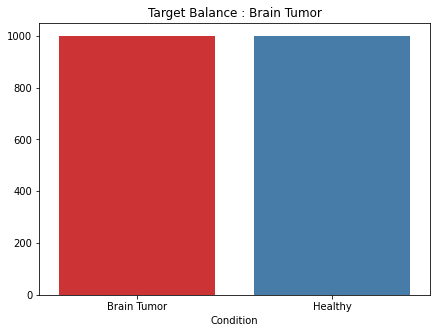

In [5]:
#Plotting data target
plt.figure(figsize=(7,5))
sns.barplot(x=['Brain Tumor','Healthy'],y=[len(brain_tumor),len(healthy)], palette ='Set1')
plt.title('Target Balance : Brain Tumor')
plt.xlabel('Condition')

Terlihat pada keseimbangan datanya bahwa dataset yang digunakan memiliki data yang balance dimana jumlah data Brain Tumor sama dengan jumalh data Brain Healthy.

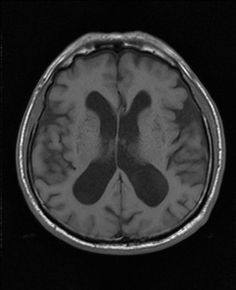

In [6]:
PIL.Image.open(str(healthy[3]))

Ini adalah contoh gambar otak yang sehat dan tidak terdapat tumor.

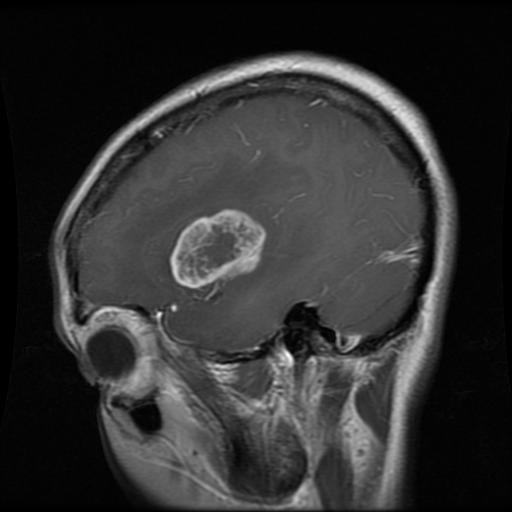

In [7]:
PIL.Image.open(str(brain_tumor[8]))

Terlihat ini adalah contoh otak yang terdapat tumornya dimana terdapat tumor yang berwarna putih ini.

* Selain itu dapat diketahui bahwa gambar yang dimiliki pada dataset tidak hanya pada tampak atas kepala. 

* Seperti pada contoh gambar otak yang sehat memiliki gambar tampak atas kepala. 
* Namun pada contoh gamabr otak yang terdapat tumor diambil dari tampak sisi samping kepala.

Sehingga dapat disimpulkan dataset ini memiliki variasi dari tampak kepala yang diambil saat CT scan. Sehingga terdapat variasi foto dari brain yang health dan brain yang terdapat tumor dengan foto-fotonya bervariasi dari tampak samping kepala, tampak belakang kepala, dan tampak atas kepala.

* Terlihat dimana sebelumnya dikatakan bahwa gambar di ambil dari tampak samping kepala, tampak belakang kepala, dan tampak atas kepala. Sehingga terdapat variasi pengambilan image pada saat melakukan CT Scan.
* Selain itu terlihat perbedaan otak yang terdapat tumor dan otak yang tidak terdapat tumor. Dimana data Brain Tumor terdapat sel tumor di otaknya sedangkan otak yang sehat tidak terdapat sel tumornya.

# Data Preprocessing

## Membuat dataset Train-Validation

Membuat parameter pembuatan dataset dimana setiap abtch terdapat 32 dengan size foto 180x180 :

In [8]:
#membuat parameter dataset
batch_size = 32 #ukuran batch data
img_height = 180 # size height dari gambar
img_width = 180 # size width dari gambar

Pada pembagian data train dan validation akan menggunakan control seed agar pembagiannya secara teratur jika di run berulang kali.

### Membuat dataset Train :

Dataset yang dibuat untuk modelling training ini sebanyak 80% dari data :

In [9]:
# data traain dengan tanda subset untuk Training
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  label_mode='binary',
  seed=98,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


### Membuat dataset Validation :

Dataset yang dibuat untuk validation model ini sebanyak 20% dari data :

In [10]:
# data validation dengan tanda subset untuk Validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode='binary',
  seed=98,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


Terlihat terdapat 1600 data untuk training dan sebanyak 400 data untuk validation.

In [11]:
class_names = train_ds.class_names
print(class_names)

['Brain Tumor', 'Healthy']


Selain itu pada kasus ini terdapat dua class yaitu Brain Tumor dan Healthy.

## Standarisasi Data

Pada data ini merupakand data foto RGB dimana memiliki values pada setiap pixelnya diantara 0 hingga 255. Sehingga perlu dilakukan normalisasi atau standarisasi data menjadi dalam range 0 hingga 1.

Selain itu normalisasi akan diinclude pada saat model definition.

In [12]:
# Melakukan normalisasi data dari range 0-255 menjadi range 0-1
standardization_layer = tf.keras.layers.Rescaling(1./255)

## Data Augmentation

Pada kasus ini akan model yang dilakukan data augmentation tetapi ada yang model tidak menggunakan data augmentation.

Data augmentation ini adalah suatu proses mengenerate gambar baru seperti image dilakukan random flip, di rotation, di zoom, dan sebagainya.

PAda kasus ini akan melakukan data augmentation berupa
- Data dilakukan flip berdasarkan sumbu horizontal agar data terdapat variasi dan mesin lebih banyak variasi belajar jika pengambilan data terbalik secara sumbu horizontal.
- Selain itu augmentasi data dengan diputar (rotate) hal ini agar mesin lebih banyak belajar variasi gambar hasil CT scan jika gambar sedikit berputar.
- Selain itu augmentasi berupa zoom agar mesin lebih banyak belajar jika data hasil CT scan memiliki variasi zoom yang berbeda-beda.

In [13]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

## Performance Data

Melakukan konfigurasi performance data dengan cache dan prefetch agar proses training lebih cepat.

In [14]:
# Autotune
AUTOTUNE = tf.data.AUTOTUNE

In [15]:
# data train
train_ds_pip = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# data validation
validation_ds_pip = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
# menypimpan data label pada data train dan data validation untuk keperluan evaluasi metrics
train_label = np.concatenate([y for x, y in train_ds_pip], axis=0)
val_label = np.concatenate([y for x, y in validation_ds_pip], axis=0) 

# Model Definition

Pada kasus ini akan melakukan prediksi Brain Tumor dari pasien suatu Rumah Sakit. Prediksi akan dilakukan dengan melakukan training pada Model Convloutional Neural Network. 

Biasanya pada CNN ini akan ada Convolutional Layer, Pooling Layer, lalu di flattening. Setelah dilakukan flattening akan dilanjutkan Artificial Neural Network dengan API yang digunakan adalah Sequential.

Pada kasus ini akan dilakukan pembuatan 1 model lalu dilakukan beberapa improvement.

Metric yang akan digunakan adalah F1 Score dan ROC-AUC Score karena pada kasus ini akan memprediksi pasien apakah terdapat tumor atau tidak pada otak. Selain itu juga akan melihat Confusion Matrixnya untuk melihat persebaran data True Positive, False Positive, False Negative, True Negative.

Selain itu metric accuracy akan digunakan untuk mengevaluasi model performance.



# Model Training

## Base Model

### First Model

Pada model pertama ini:
- Pada layer pertama adalah input leyer dimana input berupa image dengan dimensi 180x180 dengan 3 channel.
- Setelah itu melakukan standardization layer atau rescaling pada setiap pixel pada gambar agar memiliki interval 0 hingga 1
- Melakukan convulation dengan filter 32 dan kernel size [3x3] dengan activation relu dan padding (sehingga data yang tidak cukup akan dibuat zero padding)
- Setelah itu melakukan pooling dengan nilai maximum.
- Melakukan convulation lagi dengan filter 64 dan kernel size [3x3] dengan activation relu dan padding (sehingga data yang tidak cukup akan dibuat zero padding)
- Setelah itu melakukan pooling kembali dengan nilai maximum.
- Setelah itu dilakukan Flattening. 

Setelah flattenin, proses selanjutnya adalah artificial neural network dengan architecture sebagai berikut :
- Membuat hidden layer pertama dengan jumlah neuron 128 dan activationnya adalah relu.
- Membuat hidden layer kedua dengan jumlah neuron 64 dan activationnya adalah relu.
- Setelah itu adalah layer output dengan neuron 1 karena ini adalah kasus binary. Selain itu activation yang digunakan adalah sigmoid karena binary classification.

In [17]:
model1 = keras.Sequential()
model1.add(InputLayer(input_shape=(img_height,img_width,3)))
model1.add(standardization_layer)
model1.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model1.add(MaxPool2D())
model1.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model1.add(MaxPool2D())

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

Setelah itu model di compile dengan optimizer yang digunakan adalah adam dengan loss binarycrossentropy karena kasus binary. Metrics yang diigunakan adalah accuracy karena untuk melihat model performance.

In [18]:
model1.compile(optimizer='adam',loss = BinaryCrossentropy(),metrics=['accuracy'])

Melihat summary model :

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)           

Terlihat pada summary terdapat jumlah total params 16,616,641.

Melihat urutan model secara visual : 

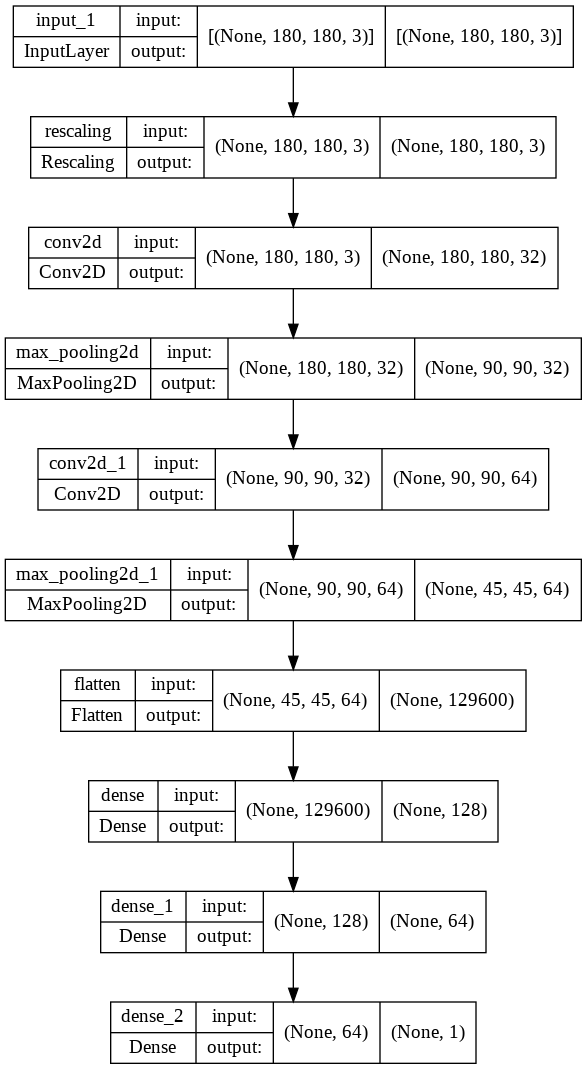

In [20]:
tf.keras.utils.plot_model(
    model1, to_file='model1.png', show_shapes=True,
    show_layer_names=True,
)

Melakukan training pada model pertama :

Model dilakukan training dengan epoch 30 saja.

In [21]:
history_1 = model1.fit(
    train_ds_pip,
    validation_data=validation_ds_pip,
    epochs=30, 
)

Epoch 1/30
50/50 [==============================] - 5s 37ms/step - loss: 0.5788 - accuracy: 0.7306 - val_loss: 0.3724 - val_accuracy: 0.8850
Epoch 2/30
50/50 [==============================] - 1s 29ms/step - loss: 0.1949 - accuracy: 0.9237 - val_loss: 0.3332 - val_accuracy: 0.8800
Epoch 3/30
50/50 [==============================] - 2s 30ms/step - loss: 0.0959 - accuracy: 0.9656 - val_loss: 0.2354 - val_accuracy: 0.9375
Epoch 4/30
50/50 [==============================] - 2s 34ms/step - loss: 0.0505 - accuracy: 0.9819 - val_loss: 0.1942 - val_accuracy: 0.9525
Epoch 5/30
50/50 [==============================] - 1s 28ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.1570 - val_accuracy: 0.9550
Epoch 6/30
50/50 [==============================] - 1s 22ms/step - loss: 0.0488 - accuracy: 0.9806 - val_loss: 0.2360 - val_accuracy: 0.9450
Epoch 7/30
50/50 [==============================] - 1s 22ms/step - loss: 0.0103 - accuracy: 0.9975 - val_loss: 0.2124 - val_accuracy: 0.9675
Epoch 8/30
50

## Model Improvement

### Second Model

Pada model kedua ini:
- Pada layer pertama adalah input leyer dimana input berupa image dengan dimensi 180x180 dengan 3 channel.
- Setelah itu melakukan standardization layer atau rescaling pada setiap pixel pada gambar agar memiliki interval 0 hingga 1
- Melakukan convulation dengan filter 32 dan kernel size [3x3] dengan activation relu dan padding (sehingga data yang tidak cukup akan dibuat zero padding)
- Setelah itu melakukan pooling dengan nilai maximum.
- Melakukan convulation lagi dengan filter 64 dan kernel size [3x3] dengan activation relu dan padding (sehingga data yang tidak cukup akan dibuat zero padding)
- Setelah itu melakukan pooling kembali dengan nilai maximum.
- Setelah itu dilakukan Flattening. 

Sehingga pada feature mapping tidak ada perbedaan dengan model pertama, namun pada model kedua ini akan dicoba dilakukan improvement dengan menambahkan layen batch normalization dan juga layer dropout pada bagian artificial neural networknya.

Sehingga artificial neural network dengan architecture sebagai berikut :

- Membuat hidden layer pertama dengan jumlah neuron 128 dan activationnya adalah relu.
- Dilakukan batch normalization pada data. Unutk control std mean var.
- Dilakukan Dropout dengan rate 0.3.
- Membuat hidden layer kedua dengan jumlah neuron 64 dan activationnya adalah relu.
- Dilakukan batch normalization pada data. Unutk control std mean var.
- Dilakukan Dropout dengan rate 0.3.
- Setelah itu adalah layer output dengan neuron 1 karena ini adalah kasus binary. Selain itu activation yang digunakan adalah sigmoid karena binary classification.

In [22]:
model2 = keras.Sequential()
model2.add(InputLayer(input_shape=(img_height,img_width,3)))
model2.add(standardization_layer)
model2.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model2.add(MaxPool2D())
model2.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model2.add(MaxPool2D())

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.3))
model2.add(Dense(64, activation="relu"))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.3))
model2.add(Dense(1, activation="sigmoid"))

Setelah itu model di compile dengan optimizer yang digunakan adalah adam dengan loss binarycrossentropy karena kasus binary. Metrics yang diigunakan adalah accuracy karena untuk melihat model performance.

In [23]:
model2.compile(optimizer='adam',loss = BinaryCrossentropy(),metrics=['accuracy'])

Melihat summary model :

In [24]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 129600)           

Terlihat pada summary terdapat non trainable params karena ditambahnya layer dropout.

Melihat flow model :

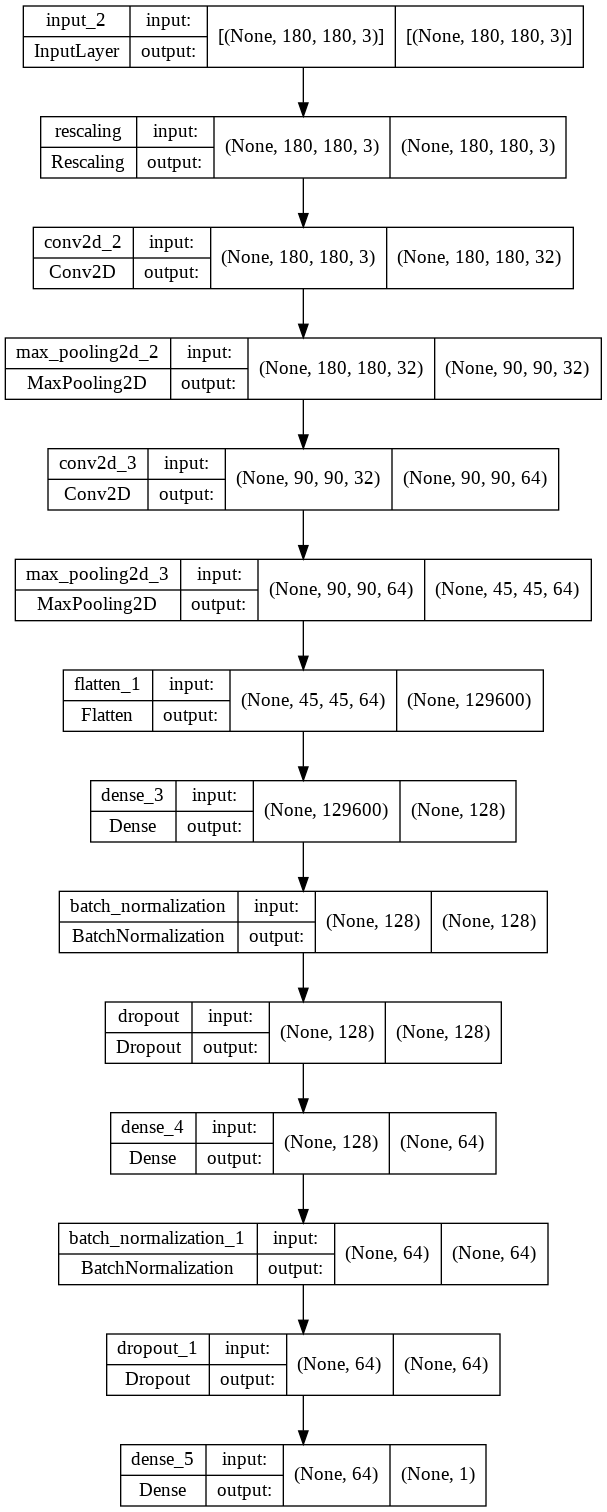

In [25]:
tf.keras.utils.plot_model(
    model2, to_file='model2.png', show_shapes=True,
    show_layer_names=True,
)

Melakukan training model kedua dengan epochs 30.

In [26]:
history_2 = model2.fit(
    train_ds_pip,
    validation_data=validation_ds_pip,
    epochs=30,
)

Epoch 1/30
50/50 [==============================] - 2s 26ms/step - loss: 0.4412 - accuracy: 0.7987 - val_loss: 0.5704 - val_accuracy: 0.6900
Epoch 2/30
50/50 [==============================] - 1s 23ms/step - loss: 0.2598 - accuracy: 0.8875 - val_loss: 0.3442 - val_accuracy: 0.8250
Epoch 3/30
50/50 [==============================] - 1s 23ms/step - loss: 0.1838 - accuracy: 0.9256 - val_loss: 0.1924 - val_accuracy: 0.9425
Epoch 4/30
50/50 [==============================] - 1s 23ms/step - loss: 0.1201 - accuracy: 0.9613 - val_loss: 0.1716 - val_accuracy: 0.9400
Epoch 5/30
50/50 [==============================] - 1s 23ms/step - loss: 0.0913 - accuracy: 0.9663 - val_loss: 0.1514 - val_accuracy: 0.9350
Epoch 6/30
50/50 [==============================] - 1s 23ms/step - loss: 0.0549 - accuracy: 0.9850 - val_loss: 1.1573 - val_accuracy: 0.6125
Epoch 7/30
50/50 [==============================] - 1s 23ms/step - loss: 0.0434 - accuracy: 0.9900 - val_loss: 0.1903 - val_accuracy: 0.9575
Epoch 8/30
50

### Third Model

Pada model ketiga ini:

pada model ketiga ini akan dicoba dilakukan dengan menambah proses data augmentation. Dimana biasanya data augmentation dilakukan untuk mencegah terjadinya overfitting dengan menambah variasi dari data. Data augmentation sudah didefnisikan pada bagian Data Preprocessing.

- Pada layer pertama adalah Data Augmentation dengan input berupa image dengan dimensi 180x180 dengan 3 channel.
- Setelah itu melakukan standardization layer atau rescaling pada setiap pixel pada gambar agar memiliki interval 0 hingga 1
- Melakukan convulation dengan filter 32 dan kernel size [3x3] dengan activation relu dan padding (sehingga data yang tidak cukup akan dibuat zero padding)
- Setelah itu melakukan pooling dengan nilai maximum.
- Melakukan convulation lagi dengan filter 64 dan kernel size [3x3] dengan activation relu dan padding (sehingga data yang tidak cukup akan dibuat zero padding)
- Setelah itu melakukan pooling kembali dengan nilai maximum.
- Setelah itu dilakukan Flattening. 

Setelah dilakukan flattening akan dikoneksikan ke architecture artificial neural network yang sama dengan model kedua. Sehingga pada model ketiga ini hanya penambahan data augmentation.

Sehingga artificial neural network dengan architecture sebagai berikut :

- Membuat hidden layer pertama dengan jumlah neuron 128 dan activationnya adalah relu.
- Dilakukan batch normalization pada data. Unutk control std mean var.
- Dilakukan Dropout dengan rate 0.3.
- Membuat hidden layer kedua dengan jumlah neuron 64 dan activationnya adalah relu.
- Dilakukan batch normalization pada data. Unutk control std mean var.
- Dilakukan Dropout dengan rate 0.3.
- Setelah itu adalah layer output dengan neuron 1 karena ini adalah kasus binary. Selain itu activation yang digunakan adalah sigmoid karena binary classification.

In [27]:
model3 = keras.Sequential()
model3.add(data_augmentation)
model3.add(standardization_layer)
model3.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model3.add(MaxPool2D())
model3.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model3.add(MaxPool2D())

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(rate=0.3))
model3.add(Dense(64, activation="relu"))
model3.add(BatchNormalization())
model3.add(Dropout(rate=0.3))
model3.add(Dense(1, activation="sigmoid"))

Setelah itu model di compile dengan optimizer yang digunakan adalah adam dengan loss binarycrossentropy karena kasus binary. Metrics yang diigunakan adalah accuracy karena untuk melihat model performance.

In [28]:
model3.compile(optimizer='adam',loss = BinaryCrossentropy(),metrics=['accuracy'])

Melihat summary model :

In [29]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

Melihat flow model :

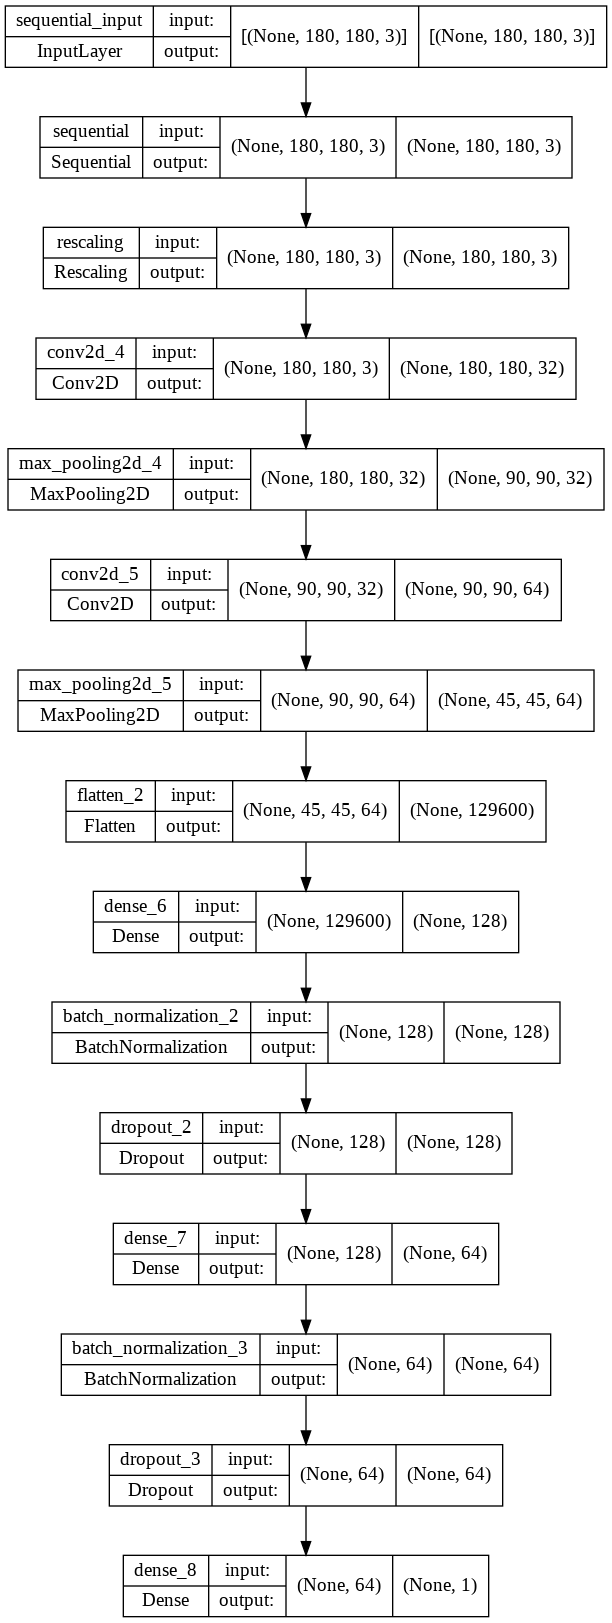

In [30]:
tf.keras.utils.plot_model(
    model3, to_file='model3.png', show_shapes=True,
    show_layer_names=True,
)

Melakukan training pada model ketiga dengan epochs 30.

In [31]:
history_3 = model3.fit(
    train_ds_pip,
    validation_data=validation_ds_pip,
    epochs=30,
)

Epoch 1/30
50/50 [==============================] - 3s 28ms/step - loss: 0.5190 - accuracy: 0.7719 - val_loss: 0.7691 - val_accuracy: 0.4675
Epoch 2/30
50/50 [==============================] - 1s 26ms/step - loss: 0.3681 - accuracy: 0.8413 - val_loss: 0.4643 - val_accuracy: 0.8150
Epoch 3/30
50/50 [==============================] - 1s 25ms/step - loss: 0.3467 - accuracy: 0.8569 - val_loss: 0.7278 - val_accuracy: 0.6475
Epoch 4/30
50/50 [==============================] - 1s 26ms/step - loss: 0.3128 - accuracy: 0.8625 - val_loss: 0.3618 - val_accuracy: 0.8800
Epoch 5/30
50/50 [==============================] - 1s 25ms/step - loss: 0.2734 - accuracy: 0.8750 - val_loss: 0.2928 - val_accuracy: 0.8600
Epoch 6/30
50/50 [==============================] - 1s 26ms/step - loss: 0.2710 - accuracy: 0.8856 - val_loss: 0.2207 - val_accuracy: 0.9175
Epoch 7/30
50/50 [==============================] - 1s 26ms/step - loss: 0.2572 - accuracy: 0.8894 - val_loss: 0.3070 - val_accuracy: 0.8600
Epoch 8/30
50

# Model Evaluation

## First Model

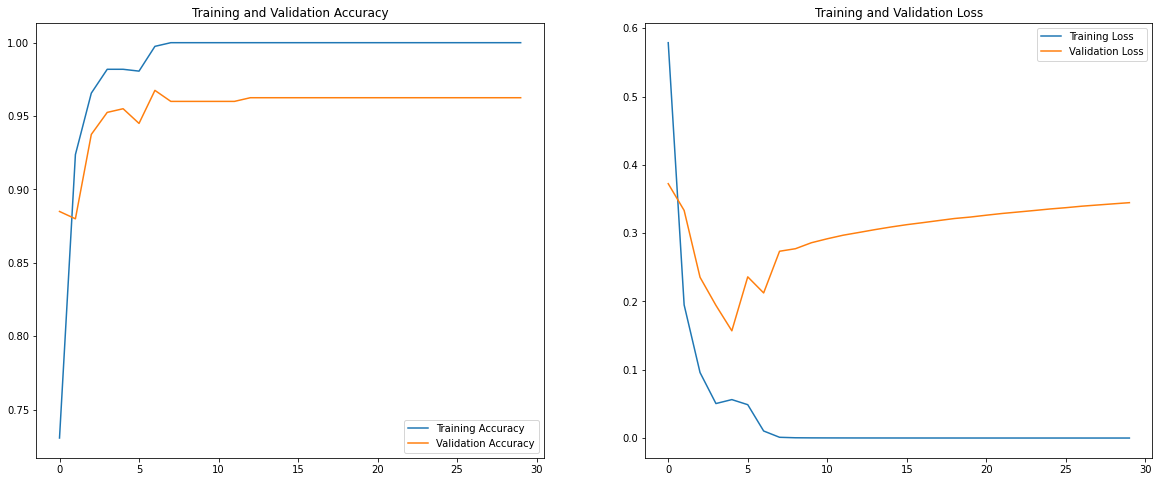

In [32]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Pada plotting hasil metric accuracy terhadap epochnya terlihat pada model pertama ini masih dapat dibilang overfitting karena terdapat gap yang lumayan besar antara data train dan validationnya.

- Selain itu pada loss nya data validation lossnya terus meningkat sehingga loss data train dan validation tidak akan bertemu.

In [33]:
# Melakukan prediksi pada data Train
y_pred_train = model1.predict(train_ds_pip)
y_pred_train = y_pred_train.round() #round dimana ketika proba diatas 0.5 terprediksi 1 dan dibawahnya maka 0

# Melakukan prediksi pada data Validation
y_pred_val = model1.predict(validation_ds_pip)
y_pred_val = y_pred_val.round() #round dimana ketika proba diatas 0.5 terprediksi 1 dan dibawahnya maka 0

In [34]:
# membandingkan F1 score data train dan validation
print("F1 Score based model train: ",metrics.f1_score(train_label,y_pred_train))
print("F1 Score based model validation: ",metrics.f1_score(val_label,y_pred_val))

F1 Score based model train:  1.0
F1 Score based model validation:  0.9643705463182898


- Terlihat jika dibandingkan pada hasil training terlihat bahwa cukup overfitting dengan perbedaan sebesar 0.04 atau sebesar 4%.

In [35]:
print("F1 Score based model validation: ",metrics.f1_score(val_label,y_pred_val))
print("ROC-AUC Score based model validation: ",metrics.roc_auc_score(val_label,y_pred_val))
print("Accuracy Score based model validation: ",metrics.accuracy_score(val_label,y_pred_val))
print("Precision Score based model validation: ",metrics.precision_score(val_label,y_pred_val))
print("Recall Score based model validation: ",metrics.recall_score(val_label,y_pred_val))

F1 Score based model validation:  0.9643705463182898
ROC-AUC Score based model validation:  0.9617906115503954
Accuracy Score based model validation:  0.9625
Precision Score based model validation:  0.9441860465116279
Recall Score based model validation:  0.9854368932038835


- Berdasarkan hasil metricnya, model dapat membedakan True Positive dan True Negative sebessar 96.18% dengan dilihat pada score ROC-AUC nya.
- Selain itu F1 score yang didapat juga cukup baik yaitu 0.96
- Pada model pertama ini didapat nilai recall lebih tinggi dibandingkan precisionnya, sehingga model memprediksi False Negative lebih kecil.

<Figure size 1080x1080 with 0 Axes>

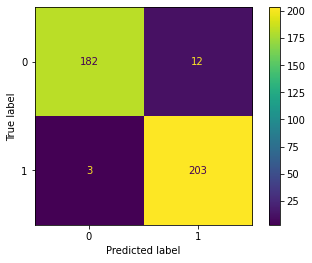

In [36]:
plt.figure(figsize=(15,15))
cm = metrics.confusion_matrix(val_label,y_pred_val, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()

- Pada data ini nilai 0 adalah label Brain Tumor dan nilai 1 adalah label Brain Healthy.
- Terlihat pada data ini karena merupakan masalah kesehatan sehingga diminimalisasikan hasil kesalahan deteksi dimana seharusnya terdapat Tumor tetapi malah data yang terprediksi tidak ada tumor. Hal ini cukup fatal karena dapat mecakup penangan dari seorang pasien.
- Pada model ini terdapat 12 data yang seharusnya terdeteksi tumor tetapi malah terdeteksi healthy. Sehingga hal ini perlu di minimalkan. Selain itu terdapat 3 data yang seharusnya terdeteksi normal tetapi yang terdeteksi adalah Brain Tumor.

## Second Model

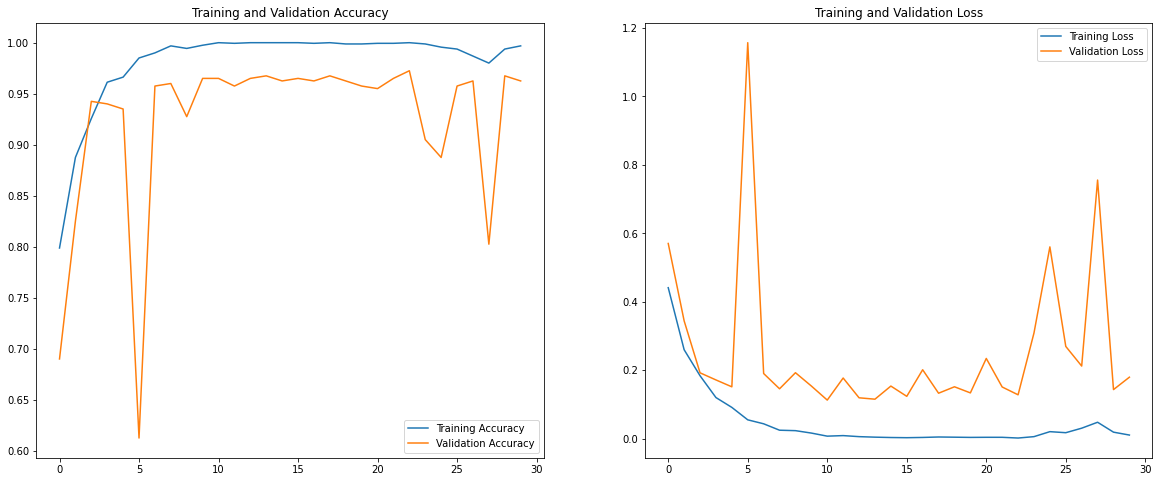

In [37]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Pada plotting hasil metric accuracy terhadap epochnya terlihat pada model kedua ini masih dapat dibilang overfitting namun jika dibandingkan model pertama pada model ini mengalami peningkatan karena gapnya yang semakin kecil.

- Selain itu pada loss nya data validation lossnya juga berbeda dengan model pertama dimana loss pada data train dan validation memiliki gap yang kecil.

In [38]:
# Melakukan prediksi pada data Train
y_pred_train = model2.predict(train_ds_pip)
y_pred_train = y_pred_train.round() #round dimana ketika proba diatas 0.5 terprediksi 1 dan dibawahnya maka 0

# Melakukan prediksi pada data Validation
y_pred_val = model2.predict(validation_ds_pip)
y_pred_val = y_pred_val.round() #round dimana ketika proba diatas 0.5 terprediksi 1 dan dibawahnya maka 0

In [39]:
# membandingkan F1 score data train dan validation
print("F1 Score based model train: ",metrics.f1_score(train_label,y_pred_train))
print("F1 Score based model validation: ",metrics.f1_score(val_label,y_pred_val))

F1 Score based model train:  0.9993698802772526
F1 Score based model validation:  0.9645390070921986


- Terlihatbahwa perbedaan data train dan validation pada model kedua ini mengalami penurunan menjadi 0.03 atau sebesar 3% berbeda dengan model pertama yang perbedaannya sebesar 4%. Sehingga pada model kedua terdapat improvement.

In [40]:
print("F1 Score based model validation: ",metrics.f1_score(val_label,y_pred_val))
print("ROC-AUC Score based model validation: ",metrics.roc_auc_score(val_label,y_pred_val))
print("Accuracy Score based model validation: ",metrics.accuracy_score(val_label,y_pred_val))
print("Precision Score based model validation: ",metrics.precision_score(val_label,y_pred_val))
print("Recall Score based model validation: ",metrics.recall_score(val_label,y_pred_val))

F1 Score based model validation:  0.9645390070921986
ROC-AUC Score based model validation:  0.9616404764287859
Accuracy Score based model validation:  0.9625
Precision Score based model validation:  0.9400921658986175
Recall Score based model validation:  0.9902912621359223


- Berdasarkan hasil metricnya, model dapat membedakan True Positive dan True Negative sebessar 96.16% dengan dilihat pada score ROC-AUC nya yang kurang lebih sama dengan model pertama.
- Selain itu F1 score yang didapat juga cukup baik yaitu 0.96
- Pada model kedua ini didapat nilai recall lebih tinggi dibandingkan precisionnya, sehingga model memprediksi False Negative lebih kecil. Hal ini sama dengan model pertama.

<Figure size 1080x1080 with 0 Axes>

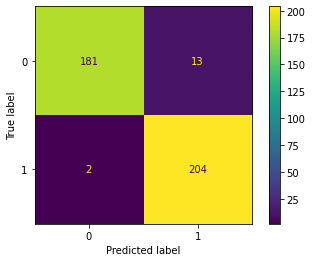

In [41]:
plt.figure(figsize=(15,15))
cm = metrics.confusion_matrix(val_label,y_pred_val, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()

- Pada data ini nilai 0 adalah label Brain Tumor dan nilai 1 adalah label Brain Healthy.
- Terlihat pada data ini karena merupakan masalah kesehatan sehingga diminimalisasikan hasil kesalahan deteksi dimana seharusnya terdapat Tumor tetapi malah data yang terprediksi tidak ada tumor. Hal ini cukup fatal karena dapat mecakup penangan dari seorang pasien.
- Pada model ini terdapat 13 data yang seharusnya terdeteksi tumor tetapi malah terdeteksi healthy. Sehingga hal ini perlu di minimalkan. Selain itu terdapat 2 data yang seharusnya terdeteksi normal tetapi yang terdeteksi adalah Brain Tumor.
- Pada model kedua ini terlihat terjadi pengurangan data False Negative dan penignkatan False Positive.

## Third Model

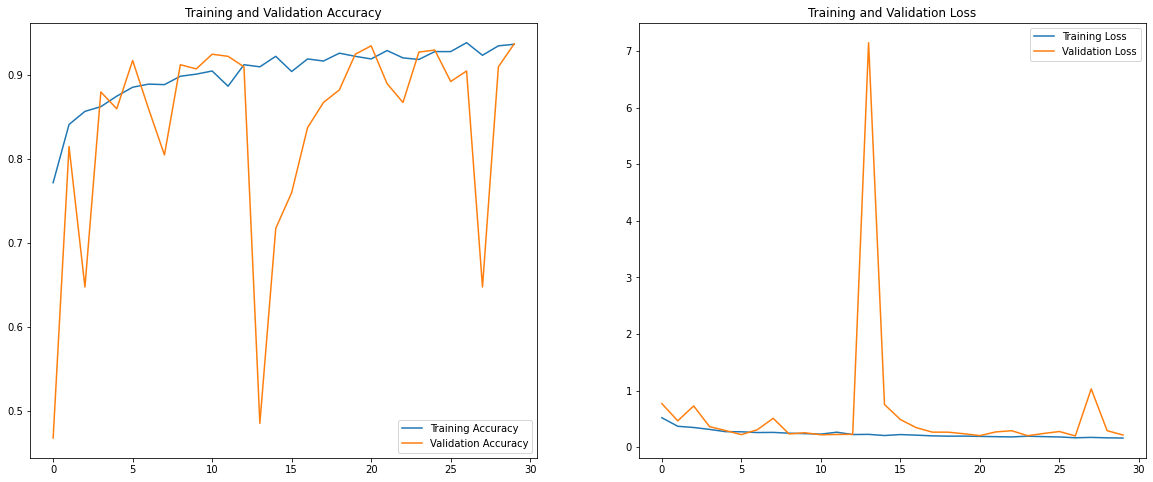

In [42]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Pada plotting hasil metric accuracy terhadap epochnya terlihat pada model ketiga ini mengalami peningkatan baik dari segi accuracy dan lossnya dimana model menjadi goodfit karena gap yang sangat kecil antar data train dan data validationnya.

In [43]:
# Melakukan prediksi pada data Train
y_pred_train = model3.predict(train_ds_pip)
y_pred_train = y_pred_train.round() #round dimana ketika proba diatas 0.5 terprediksi 1 dan dibawahnya maka 0

# Melakukan prediksi pada data Validation
y_pred_val = model3.predict(validation_ds_pip)
y_pred_val = y_pred_val.round() #round dimana ketika proba diatas 0.5 terprediksi 1 dan dibawahnya maka 0

In [44]:
# membandingkan F1 score data train dan validation
print("F1 Score based model train: ",metrics.f1_score(train_label,y_pred_train))
print("F1 Score based model validation: ",metrics.f1_score(val_label,y_pred_val))

F1 Score based model train:  0.9526123936816525
F1 Score based model validation:  0.9419953596287703


- Terlihatbahwa perbedaan data train dan validation pada model ketiga ini mengalami penurunan menjadi 0.01 atau sebesar 1% berbeda dengan model kedua yang perbedaannya sebesar 3%. Sehingga pada model kketiga terdapat improvement dengan gap antar hasil train dan validation berkurang sebesar 2%.

In [45]:
print("F1 Score based model validation: ",metrics.f1_score(val_label,y_pred_val))
print("ROC-AUC Score based model validation: ",metrics.roc_auc_score(val_label,y_pred_val))
print("Accuracy Score based model validation: ",metrics.accuracy_score(val_label,y_pred_val))
print("Precision Score based model validation: ",metrics.precision_score(val_label,y_pred_val))
print("Recall Score based model validation: ",metrics.recall_score(val_label,y_pred_val))

F1 Score based model validation:  0.9419953596287703
ROC-AUC Score based model validation:  0.9360174156741067
Accuracy Score based model validation:  0.9375
Precision Score based model validation:  0.9022222222222223
Recall Score based model validation:  0.9854368932038835


- Berdasarkan hasil metricnya, model dapat membedakan True Positive dan True Negative sebessar 93.6% dengan dilihat pada score ROC-AUC nya yang kurang lebih sama dengan model pertama.
- Selain itu F1 score yang didapat juga cukup baik yaitu 0.93
- Pada model kedua ini didapat nilai recall lebih tinggi dibandingkan precisionnya, sehingga model memprediksi False Negative lebih kecil. Hal ini sama dengan model pertama dan kedua.
- Secara metric walaupun model menjadi goodfit tetapi model menghasilkan metric score F1 dan ROC-AUC yang lebih kecil dibandingkan model kedua dan pertama.

<Figure size 1080x1080 with 0 Axes>

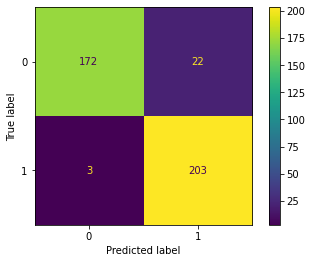

In [46]:
plt.figure(figsize=(15,15))
cm = metrics.confusion_matrix(val_label,y_pred_val, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()

- Pada data ini nilai 0 adalah label Brain Tumor dan nilai 1 adalah label Brain Healthy.
- Terlihat pada data ini karena merupakan masalah kesehatan sehingga diminimalisasikan hasil kesalahan deteksi dimana seharusnya terdapat Tumor tetapi malah data yang terprediksi tidak ada tumor. Hal ini cukup fatal karena dapat mecakup penangan dari seorang pasien.
- Pada model ini terdapat 22 data yang seharusnya terdeteksi tumor tetapi malah terdeteksi healthy. Sehingga hal ini perlu di minimalkan. Selain itu terdapat 3 data yang seharusnya terdeteksi normal tetapi yang terdeteksi adalah Brain Tumor.
- Pada model kedua ini terlihat terjadi peningkatan data False Negative dan penignkatan False Positive. Karena menurunnya metrics F1 Score, Precision, dan Recall. 

## Model Selection

- Sehingga pada kasus ini terlihat selama melakukan improvement dari model pertama hingga model ketiga, model menjadi goodfit terlihat pada hasil model ketiga.
- Namun walaupun model ini menjadi goodfit terlihat bahwa metric score yang dihasilkan menjadi menurun seperti pada roc-auc score dan f1 scorenya. Sehingga hal ini juga menjadi pertimbangan dalam selection model.
- Sehingga disini model yang dipilih untuk kasus ini adalah model yang goodfit. Karena walaupun metric menurun tetapi tetap menghasilkan model yang goodfit.

# Model Saving

Freeze model :

In [76]:
# freeze model
model3.trainable = False

Saving model :

In [77]:
# save model
model3.save('model_brain_cancer_sel')
model3.save("model_brain_cancer.h5")

Melakukan zip model agar bisa di download model yang akan digunakan sebagai backend.

In [78]:
! zip -r model3.zip model_brain_cancer_sel

  adding: model_brain_cancer_sel/ (stored 0%)
  adding: model_brain_cancer_sel/assets/ (stored 0%)
  adding: model_brain_cancer_sel/variables/ (stored 0%)
  adding: model_brain_cancer_sel/variables/variables.data-00000-of-00001 (deflated 28%)
  adding: model_brain_cancer_sel/variables/variables.index (deflated 69%)
  adding: model_brain_cancer_sel/keras_metadata.pb (deflated 92%)
  adding: model_brain_cancer_sel/saved_model.pb (deflated 89%)


# Model Inference

Loading data inference :

In [79]:
test_image_cancer = r'/content/cancer_inference.jpg'
test_image_normal = r'/content/normal_inference.jpg'
img_cancer = keras.preprocessing.image.load_img(
    test_image_cancer, target_size=(img_height, img_width)
)
img_normal = keras.preprocessing.image.load_img(
    test_image_normal, target_size=(img_height, img_width)
)

## Prediksi Brain Tumor

Foto hasil CT Scan data pertama :

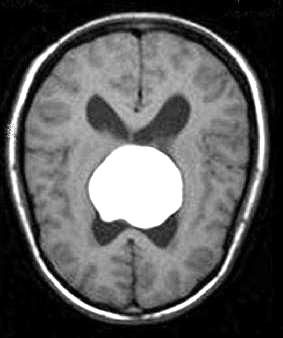

In [84]:
PIL.Image.open(str(test_image_cancer))

In [80]:
img_array_cancer = keras.preprocessing.image.img_to_array(img_cancer)
img_array_cancer = tf.expand_dims(img_array_cancer, 0)

predictions_cancer = model3.predict(img_array_cancer)
predictions_cancer = predictions_cancer.round()

## Prediksi Brain Healthy

Foto hasil CT Scan data kedua :

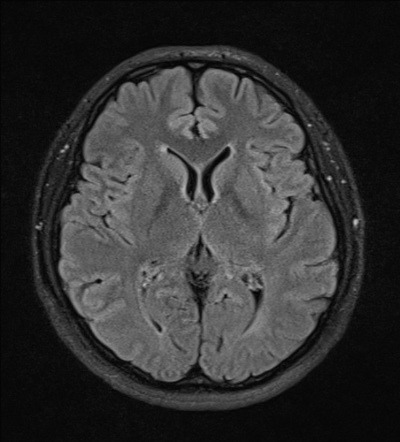

In [85]:
PIL.Image.open(str(test_image_normal))

In [81]:
img_array_normal = keras.preprocessing.image.img_to_array(img_normal)
img_array_normal = tf.expand_dims(img_array_normal, 0)

predictions_normal = model3.predict(img_array_normal)
predictions_normal = predictions_normal.round()

## Result Inference

In [82]:
print('Hasil prediksi pada data pertama',predictions_cancer)
print('Hasil prediksi pada data kedua',predictions_normal)

Hasil prediksi pada data pertama [[0.]]
Hasil prediksi pada data kedua [[1.]]


Terlihat pada data pertama adalah gambar brain yang memang seharusnya terdeteksi tumor dan data kedua adalah gambar brain yang healthy.

Sehingga model berhasil melakukan prediksi data inference.

# Conclusion

Sehingga kesimpulannya sebagai berikut :

- Pada milestone ini menggunakan dataset gambar brain tumor dan healthy untuk memprediksi apakah terdapat tumor pada otaknya atau sehat.
- Dataset yang balance dimana jumlah data Brain Tumor sama dengan jumalh data Brain Healthy.
- Terlihat dimana sebelumnya dikatakan bahwa gambar di ambil dari tampak samping kepala, tampak belakang kepala, dan tampak atas kepala. Sehingga terdapat variasi pengambilan image pada saat melakukan CT Scan.
- Selain itu terlihat perbedaan otak yang terdapat tumor dan otak yang tidak terdapat tumor. Dimana data Brain Tumor terdapat sel tumor di otaknya sedangkan otak yang sehat tidak terdapat sel tumornya.

Pada tugas ini berhasil membuat model deep learning Convolutional Neural Network (CNN) dengan Sequential API. Dimana dilakukan model improvement untuk meningkatkan model performance. Model performance dilihat dari metrics accuracy.

Sebelum Data dilakukan training, data dilakukan preprocessing terlbih dahulu, dimana dilakukan sebagi berikut :
- Splitting data menjadi data Train sebesar 80% dan data validation sebesar 20%.
- Melakukan Standarisasi Data dari interval 0-255 menjadi 0-1.
- Melakukan Data Augmentation untuk mengurangi terjadinya overfitting. Data Augmentation yang dilakukan adalah flip (sumbu horizontal), rotation, dan zoom.
- Melakukan performance configuration data dengan cache dan prefect agar data di proses dengan cepat.


Setelah itu dilakukan training model. Model dilakukan improvement sebanyak dua kali dari model basenya dimana improvement yang dilakukan adalah sebagi berikut :
- Pada model kedua dilakukan improvement dari model pertama dengan menambahkan layer Dropout dan Batch Normalization.
- Pada model ketiga dilakukan improvement dari model kedua dengan menambahkan Data Augmentation apda proses awalnya untuk mengurangi overfitting.

Sehingga hasil dari improvementnya :

- Terlihat pada model pertama ke model kedua terdapat improvement dari segi pergerakan accuracynya. Dimana model menjadi lebih ke arah good fit dengan gap antara data train dan data validation menjadi menuju konvergen jika dibandingkan pada model pertama data lebih mengarah divergen pada lossnya. Sehingga penambahan dropout dan batch normalization mereduksi terjadinya overfitting.
- Pada model kedua ke model ketiga, hasil data train dan data validation menjadi berimpitan dengan gap hanya sebesar 1%. Sehingga hal ini juga menandakan dengan adanya Data Augmentation bisa mengurangi terjadinya Overfitting. Hal ini terjadi karena mesin menjadi lebih banyak belajar pada kemungkinan variasi-variasi data.

Selain itu model yang dipilih adalah model ketiga karena model ini termasuk dalam kategori goodfit. Selain itu juga metrics score yang dihasilkan sangatlah baik karena score yang didapat diatas 0.9 seluruhnya. Namun perlu adanya pengembangan pada model kembali untuk mengurangi data-data yang kemungkinan terjadinya kesalahan prediksi yang dapat menyebakan fatal pada dunia kesehatan.

Selain itu model berhasil dilakukan inference dan dideploy pada link :

- frontend = https://braintumor-detection-fe.herokuapp.com/
- backend = http://braintumor-backend.herokuapp.com/v1/models/model_brain_cancer_sel:predict


Future Improvement :

- Mencoba melakukan variasi dari segi architecturenya model.
- Menocba jika epoch di atas 100.